In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
#from sklearn.metrics import calinski_harabaz_score,silhouette_score
import statistics
from sklearn.metrics import silhouette_score
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import hamming_loss


## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set Monte-Carlo Simulation
Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

In [2]:
df = pd.read_csv('../data/Frogs_MFCCs.csv')


In [3]:
whole = df


In [4]:
df = df.drop(columns = ['Family','Genus','Species','RecordID'])


In [5]:
df = df.to_numpy()


### a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

### b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

### c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [6]:
def maj (label):
    label_count = {}
    for i in range(0,optimal_k):
        true_label = []
        for j in range(len(pred.tolist())):
            if pred.tolist()[j] == i:
                true_label.append(whole[label].tolist()[j])
        maxlabel = max(true_label,key=true_label.count)
        label_count[i] = maxlabel
    return (label_count)

In [7]:
mt_hamming_distance = []
mt_hamming_loss = []
mt_hamming_score = []
for rs in range(50):
    silhouette_score_dict = {}
    for k in range(2,51,1):#(1,51,1)
        estimator = KMeans(n_clusters=k,random_state=rs)
        estimator.fit(df)
        pred = estimator.predict(df)
        silhouette_score_dict[k] = silhouette_score(df,pred)
    optimal_k = max(silhouette_score_dict, key = silhouette_score_dict.get)
    print ('random state:',rs,'optimal_k: ',optimal_k, '; silhouette_score: ', silhouette_score_dict[optimal_k])
    estimator = KMeans(n_clusters=optimal_k,random_state=52)
    estimator.fit(df)
    pred = estimator.predict(df)

    f = maj('Family')
    g = maj('Genus')
    s = maj('Species')
    maj_tuple_dict = {}
    for i in f.keys():
        maj_tuple_dict[i]=[f[i],g[i],s[i]]
    sum = 0
    for i in range(len(pred.tolist())):
        for j,k in zip([f,g,s],[whole['Family'],whole['Genus'],whole['Species']]):
            if  j[pred.tolist()[i]] != k[i]:
                sum+=1
    mt_hamming_distance.append(sum/len(pred.tolist()))
    mt_hamming_loss.append(sum/(len(pred.tolist())*3))
    mt_hamming_score.append(1-sum/(len(pred.tolist())*3))
    print ('hamming distance is', sum/len(pred.tolist()))
    print ('hamming_loss is', sum/(len(pred.tolist())*3))
    print ('hamming_score is', 1-sum/(len(pred.tolist())*3))
    print ('-----------------------------------------')
    

random state: 0 optimal_k:  4 ; silhouette_score:  0.3788646212055977
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 1 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 2 optimal_k:  4 ; silhouette_score:  0.38523395202479643
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 3 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 4 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.665323141070187

random state: 37 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 38 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 39 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 40 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.6653231410701876
hamming_loss is 0.22177438035672922
hamming_score is 0.7782256196432707
-----------------------------------------
random state: 41 optimal_k:  4 ; silhouette_score:  0.3787509343305295
hamming distance is 0.66532314107

In [8]:
print ('The average hamming distance is',np.mean(mt_hamming_distance))
print ('The average hamming loss is',np.mean(mt_hamming_loss))
print ('The average hamming score is',np.mean(mt_hamming_score))

The average hamming distance is 0.6653231410701876
The average hamming loss is 0.22177438035672922
The average hamming score is 0.7782256196432707


## ISLR 12.6.2

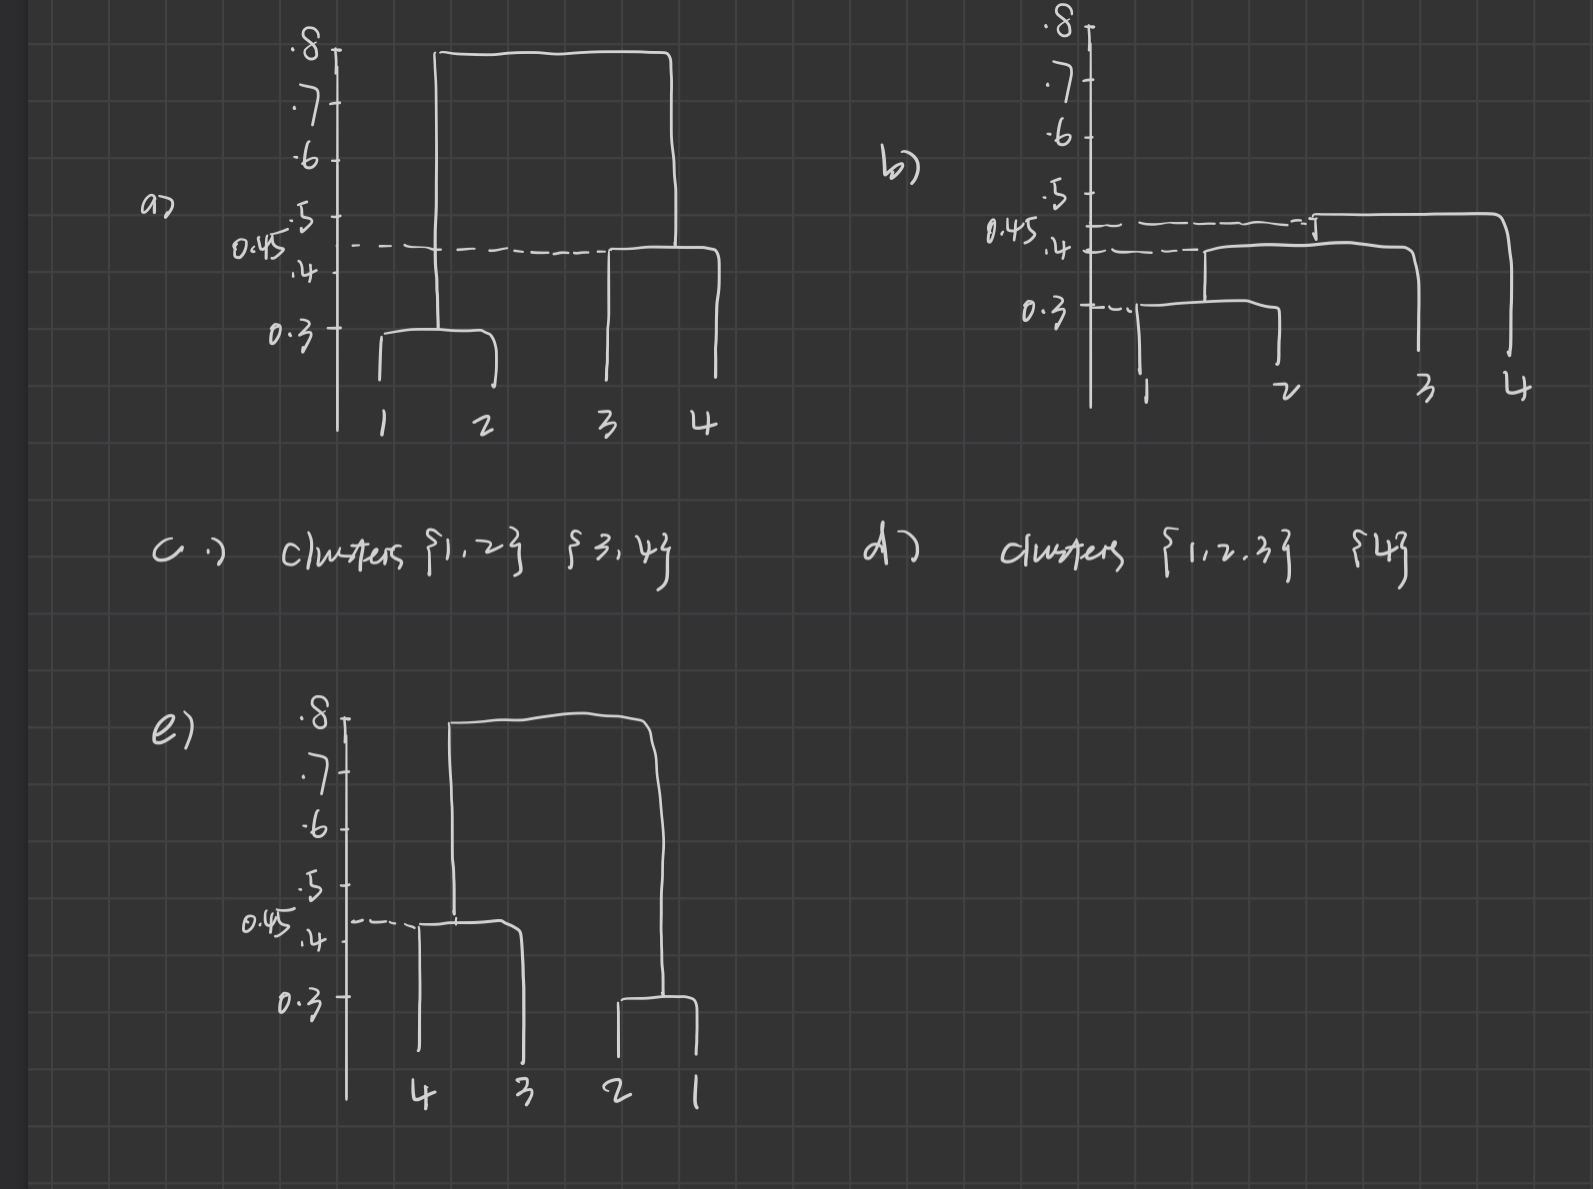